# Mnist data

In [1]:
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
%config Completer.use_jedi = False

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1,as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

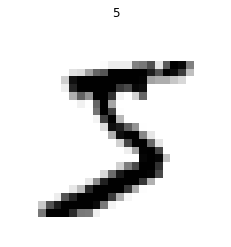

In [5]:
some_dig1 = X[0]
# some_dig1_img = np.reshape(some_dig1,(28,28)) 
# or
some_dig1_img = some_dig1.reshape(28, 28)
plt.imshow(some_dig1_img,cmap='binary')
plt.axis("off")
plt.title(y[0])
plt.show()

In [6]:
# type(y[0]) #string (str)
y = y.astype(np.uint8)
type(y[0])

numpy.uint8

In [7]:
np.zeros((5,28*28)).shape

(5, 784)

In [8]:
def plot_digits(instances, images_per_row=10,**options):
    size = 28
    img_per_row = min(len(instances),images_per_row)
    n_rows = (len(instances)-1)//img_per_row+1
    # append empty images
    n_empty = n_rows * img_per_row - len(instances)
    padded_instances = np.concatenate([instances,np.zeros((n_empty,size*size))])
    
    #reshaping into 28×28 images:
    image_grid = padded_instances.reshape((n_rows,img_per_row,size,size))
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    print(image_grid.shape)
    plt.imshow(big_image, cmap ="binary", **options)
    plt.axis("off")
    return big_image

(2, 10, 28, 28)


(56, 280)

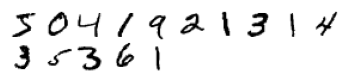

In [9]:
t = plot_digits(X[:15])
t.shape

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier

In [11]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [12]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [14]:
sgd_clf.predict([some_dig1]) #predict if 5 or not

array([ True])

In [15]:
from sklearn.model_selection import cross_val_score
sgd_score = cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

In [16]:
scores = np.sqrt(sgd_score)
scores

array([0.97485896, 0.97997449, 0.98      ])

In [17]:
scores.mean()

0.9782778178740966

In [18]:
scores.std()

0.0024175170794063974

## Accuracy is not preferred. Why? Below is the answer

In [19]:
from sklearn.base import BaseEstimator
# this output 0 of size X
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [20]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

# Using Confusion matrix

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [23]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [24]:
np.sum(y_train_perfect_predictions) # num of 5

5421

<AxesSubplot:>

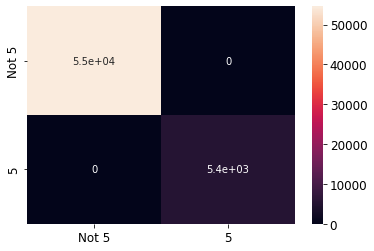

In [25]:
import seaborn as sns

y_train_perfect_predictions = y_train_5  # pretend we reached perfection
sns.heatmap(confusion_matrix(y_train_5, y_train_perfect_predictions),
                             annot=True,xticklabels=["Not 5",5],yticklabels=("Not 5",5))

In [26]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [27]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

<AxesSubplot:>

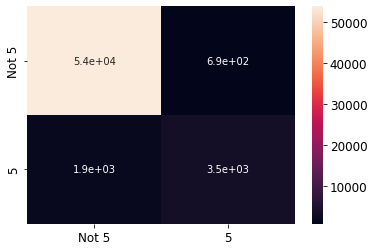

In [28]:
sns.heatmap(confusion_matrix(y_train_5, y_train_pred),
            annot=True,xticklabels=["Not 5",5],yticklabels=("Not 5",5))

* Precision = TP/(TP+F<u>P</u>)<br>
* Recall = TP/(TP+F<u>N</u>)  for cancer diagnosis (should be more as FN must be less )

In [29]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [30]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

# Precision/Recall Trade-off

In [37]:
y_scores = sgd_clf.decision_function([some_dig1])
y_scores

array([2164.22030239])

In [39]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred # V.V.Very High Precision

array([ True])

In [40]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred # V.V.Very High Recall
y_some_digit_pred

array([False])

In [44]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [45]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [46]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [48]:
precisions

array([0.09040123, 0.09038606, 0.09038757, ..., 1.        , 1.        ,
       1.        ])

In [49]:
thresholds

array([-106527.45300471, -105763.22240074, -105406.2965229 , ...,
         38871.26391927,   42216.05562787,   49441.43765905])

(-50000.0, 50000.0, 0.0, 1.0)

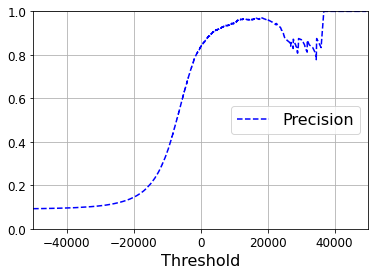

In [53]:
plt.plot(thresholds, precisions[:-1],"b--",label="Precision")
plt.legend(loc="center right", fontsize=16) # Not shown in the book
plt.xlabel("Threshold", fontsize=16)        # Not shown
plt.grid(True)                              # Not shown
plt.axis([-50000, 50000, 0, 1])             # Not shown

In [54]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])             

Saving figure precision_recall_vs_threshold_plot


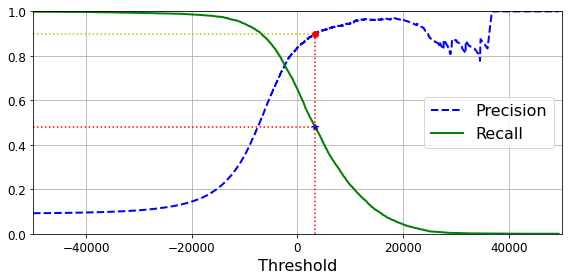

In [89]:
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

recall_90_precision = recalls[np.argmax(precisions >= 0.9)] # max recall when precision was 0.9
plt.plot([-50000,threshold_90_precision],[recall_90_precision,recall_90_precision],"r:")
plt.plot([threshold_90_precision],[recall_90_precision],"b*")

threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:") #[(x1,x2),(y1,y2)]
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "y:")
plt.plot([threshold_90_precision], [0.9], "ro")

save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

In [125]:
threshold_90_precision

3370.0194991439557

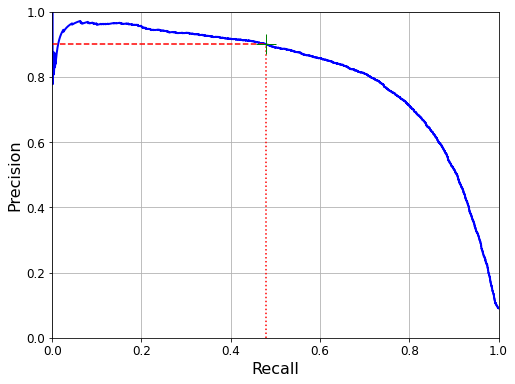

In [107]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.0,recall_90_precision],[0.9,0.9],"r--")
plt.plot([recall_90_precision,recall_90_precision],[0.0,0.9],"r:")
plt.plot([recall_90_precision],[0.9],"g+",markersize=20)
plt.show()

## The ROC curve

In [108]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [124]:
thresholds

array([  49442.43765905,   49441.43765905,   36801.60697028, ...,
       -105763.22240074, -106527.45300471, -146348.56726174])

In [114]:
recall_90_precision

0.4799852425751706

In [115]:
fpr[np.argmax(tpr >= recall_90_precision)]

0.005295076861063779

Saving figure roc_curve_plot


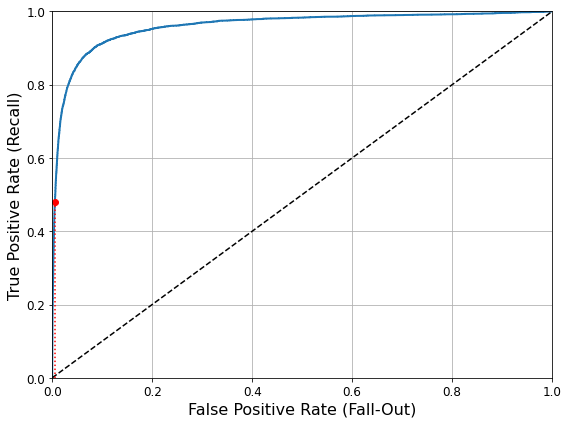

In [119]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
save_fig("roc_curve_plot")


In [135]:
fpr_90

0.005295076861063779

In [126]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [128]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [129]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [130]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class

In [134]:
print(f'Random forest roc_auc: {roc_auc_score(y_train_5, y_scores_forest)}')

Random forest roc_auc: 0.9983436731328145
